In [1]:
# Se importan las librerías y se genera un nuevo modelo con su respectivo grado.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

In [2]:
# Se cargan los datos a trabajar

dt = pd.read_csv('Advertising.csv')

a = np.array(dt['TV'])
b = np.array(dt['Radio'])
c = np.array(dt['Sales'])

In [3]:
x = np.array([a, b]).T                        # Se concatenan en una matriz traspuesta los valores de "a" y "b"
xpolinomial = poly_reg.fit_transform(x)       # Se preparan los datos para generar el modelo de regresion no lineal
regression = LinearRegression()               # Se instancia el modelo de regresión
regression.fit(xpolinomial,c)


LinearRegression()

Escriba el valor de "x" -> 123
Escriba el valor de "y" -> 14


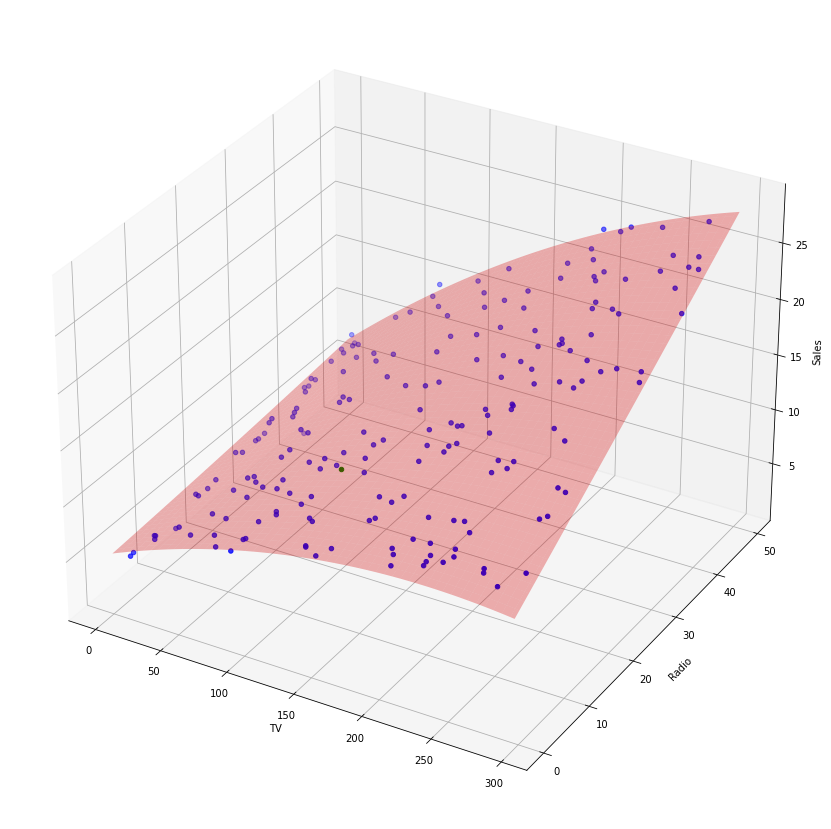

In [4]:
# Creación de la figura

fig = plt.figure(figsize = (15,15))  # Creación y asignación de las dimensiones del plano donde se verá la gráfica
ax = plt.axes(projection='3d')       # Creación de la gráfica 3d
ax.set_xlabel("TV")                   # Asignación de nombre al eje x
ax.set_ylabel("Radio")                   # Asignación de nombre al eje y
ax.set_zlabel("Sales")                   # Asignación de nombre al eje z

ax.scatter3D(a, b, c,c="blue")  

prediccionx = np.linspace(a.min(),a.max(),100) # Matriz x que genera el plano que representa el comportamiento del modelo 
predicciony = np.linspace(b.min(),b.max(),100) # Matriz y que genera el plano que representa el comportamiento del modelo 
prediccionz = np.zeros(10000).reshape(100,100) # Matriz z que gusrda los valores que calcula el modelo


X, Y = np.meshgrid(prediccionx, predicciony)

for i in range(100):
    for k in range(100):
        prediccion = regression.predict(poly_reg.fit_transform([[X[i][k], Y[i][k]]]))
        prediccionz[i][k] = prediccion
        
ax.plot_surface(X,Y,prediccionz,color="red",alpha=0.3)
# ax.view_init(90,90)
# Para calcular y predecir un valor específico y verlo en la gráfica

valorx = int(input('Escriba el valor de "x" -> '))
valory = int(input('Escriba el valor de "y" -> '))
valorz=regression.predict(poly_reg.fit_transform([[valorx,valory]]))
ax.scatter3D(valorx,valory,valorz, color="green")